## INTRODUCTION
Steve runs a top-end car showroom but his data analyst has just quit and left him without his crucial insights.
## OBJECTIVE
1. What are the details of all cars purchased in the year 2022?
2. What is the total number of cars sold by each salesperson?
3. What is the total revenue generated by each salesperson?
4. What are the details of the cars sold by each salesperson?
5. What is the total revenue generated by each car type?
6. What are the details of the cars sold in the year 2021 by salesperson 'Emily Wong'?
7. What is the total revenue generated by the sales of hatchback cars?
9. What is the name and city of the salesperson who sold the most number of cars in the year 2023?
10. What is the name and age of the salesperson who generated the highest revenue in the year 2022?

### TABLE
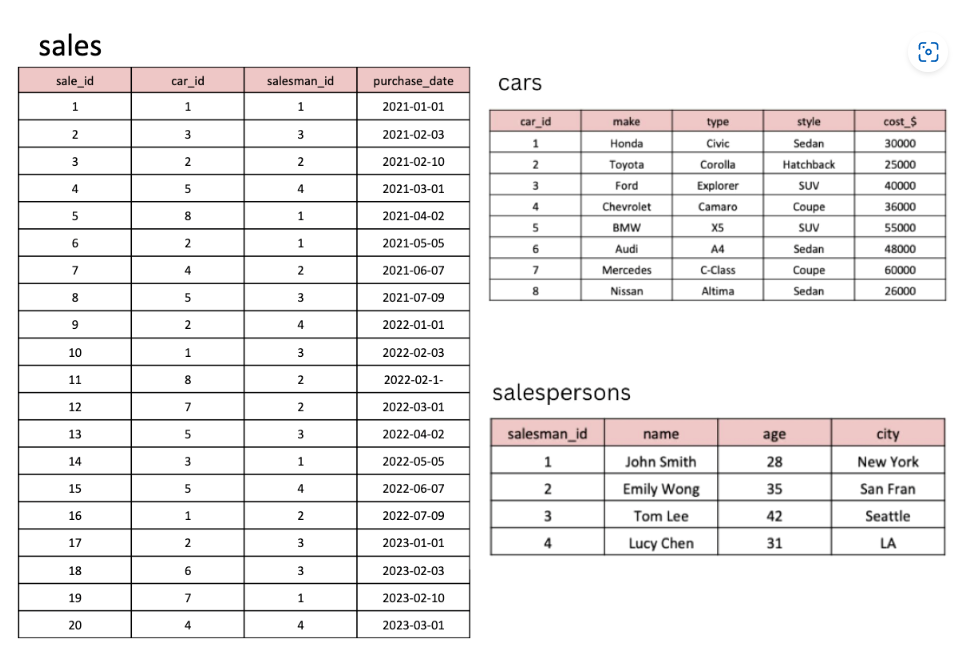

In [23]:
# Importing 
import pandas as pd
import mysql.connector
import plotly.express as px
from plotly.subplots import make_subplots
from tabulate import tabulate

In [24]:
## Establishing connection
mydb = mysql.connector.connect(
host = "localhost",
user = "Prakash",
password = "1234",
database = "car")
mycursor = mydb.cursor()

### 1. What are the details of all cars purchased in the year 2022?

In [25]:
all_cars_2022 = "select b.type from sales a join cars b on a.car_id = b.car_id where year(a.purchase_date) = 2022 group by b.type"

In [26]:
mycursor.execute(all_cars_2022)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

type
--------
Civic
Corolla
Explorer
X5
C-Class
Altima


## 2. What is the total number of cars sold by each salesperson

In [27]:
cars_sold = """select a.name , count(b.salesman_id)   as cars_sold from salespersons a 
join sales b on a.salesman_id = b.salesman_id
group by b.salesman_id
order by cars_sold desc"""
mycursor.execute(cars_sold)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

name          cars_sold
----------  -----------
Tom Lee               6
John Smith            5
Emily Wong            5
Lucy Chen             4


In [28]:
salesperson_names = [row[0] for row in r]
cars_sold_counts = [row[1] for row in r]

In [29]:
data = {
    "Salesperson Names": salesperson_names,
    "Cars Sold": cars_sold_counts,
}

In [30]:
fig = px.bar(data, x="Salesperson Names", y="Cars Sold", title="Cars Sold by Salesperson",text_auto='.2s')
fig.update_layout(
    xaxis_title="Salesperson",
    yaxis_title="Number of Cars Sold",
    barmode="group",  
)
fig.show()

## 3. What is the total revenue generated by each salesperson?

In [31]:
revenue = """select a.name  , sum(c.cost_$) as revenue  from salespersons a 
join sales b on a.salesman_id = b.salesman_id
join cars c on  b.car_id = c.car_id
group by b.salesman_id
order by revenue desc
"""
mycursor.execute(revenue)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

name          revenue
----------  ---------
Tom Lee        253000
John Smith     181000
Emily Wong     177000
Lucy Chen      171000


In [32]:
salesperson_names = [row[0] for row in r]
revenue = [row[1] for row in r]

In [33]:
data = {
    "Salesperson Names": salesperson_names,
    "Revenue": revenue,
}
fig = px.bar(data, x="Salesperson Names", y="Revenue", title="Revenue by Salesperson",text_auto='.2s')
fig.update_layout(
    xaxis_title="Salesperson",
    yaxis_title="Revenue",
    barmode="group",  
)
fig.show()

## 4. What are the details of the cars sold by each salesperson?

In [34]:
car_details = """select rank() over (partition by a.name order by b.purchase_date) as id ,  a.name, c.make,c.type,c.style , c.cost_$  from salespersons a 
join sales b on a.salesman_id = b.salesman_id
join cars c on  b.car_id = c.car_id"""
mycursor.execute(car_details)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

  id  name        make       type      style        cost_$
----  ----------  ---------  --------  ---------  --------
   1  Emily Wong  Toyota     Corolla   Hatchback     25000
   2  Emily Wong  Chevrolet  Camaro    Coupe         36000
   3  Emily Wong  Nissan     Altima    Sedan         26000
   4  Emily Wong  Mercedes   C-Class   Coupe         60000
   5  Emily Wong  Honda      Civic     Sedan         30000
   1  John Smith  Honda      Civic     Sedan         30000
   2  John Smith  Nissan     Altima    Sedan         26000
   3  John Smith  Toyota     Corolla   Hatchback     25000
   4  John Smith  Ford       Explorer  SUV           40000
   5  John Smith  Mercedes   C-Class   Coupe         60000
   1  Lucy Chen   BMW        X5        SUV           55000
   2  Lucy Chen   Toyota     Corolla   Hatchback     25000
   3  Lucy Chen   BMW        X5        SUV           55000
   4  Lucy Chen   Chevrolet  Camaro    Coupe         36000
   1  Tom Lee     Ford       Explorer  SUV           400

## 5. What is the total revenue generated by each car type?

In [35]:
 revenue_car_type = """ select  b.car_id,b.type ,(count(a.car_id) * b.cost_$)  as revenue 
 from  sales a 
 join cars b  on a.car_id = b.car_id
 group by a.car_id
"""
mycursor.execute(revenue_car_type)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

  car_id  type        revenue
--------  --------  ---------
       1  Civic         90000
       2  Corolla      100000
       3  Explorer      80000
       4  Camaro        72000
       5  X5           220000
       6  A4            48000
       7  C-Class      120000
       8  Altima        52000


In [36]:
car_type = [row[1] for row in r]
revenue = [row[2] for row in r]

In [37]:
data = {
    "Type": car_type,
    "Revenue": revenue,
}

In [38]:
fig = px.bar(data, x="Type", y="Revenue", title="Revenue by Car_type",text_auto='.2s')
fig.update_layout(
    xaxis_title="Car_type",
    yaxis_title="Revenue",
    barmode="group",  
)
fig.show()

## 6. What are the details of the cars sold in the year 2021 by salesperson 'Emily Wong'?

In [39]:
 Emily_wong_cars_sold = """select b.make,  b.type , b.make, b.style,b.cost_$ from 
 sales a  
 join cars b on a.car_id = b.car_id 
 join salespersons c on a.salesman_id = c.salesman_id
 where year(a.purchase_date) = 2021  and c.name = "Emily Wong" """
mycursor.execute(Emily_wong_cars_sold)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

make       type     make       style        cost_$
---------  -------  ---------  ---------  --------
Toyota     Corolla  Toyota     Hatchback     25000
Chevrolet  Camaro   Chevrolet  Coupe         36000


## 7. What is the total revenue generated by the sales of hatchback cars?

In [40]:
Hatchback_sales = """select b.style , sum(b.cost_$) as revenue 
from  sales a 
join cars b  on a.car_id = b.car_id
where  b.style = "Hatchback"
group by style"""
mycursor.execute(Hatchback_sales)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

style        revenue
---------  ---------
Hatchback     100000


## 8. What is the total revenue generated by the sales of SUV cars in the year 2022?

In [41]:
SUV_2022 = """select b.style , sum(b.cost_$) as revenue 
from  sales a 
join cars b  on a.car_id = b.car_id
where  year(a.purchase_date) = 2022 and b.style = "SUV"
group by style"""
mycursor.execute(SUV_2022)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

style      revenue
-------  ---------
SUV         150000


In [72]:
revenue_car_style = """ select b.style , sum(b.cost_$) as revenue , year(a.purchase_date) as year
from  sales a 
join cars b  on a.car_id = b.car_id
group by style,3
"""
mycursor.execute(revenue_car_style)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

style        revenue    year
---------  ---------  ------
Sedan          56000    2021
Sedan          86000    2022
Hatchback      50000    2021
Hatchback      25000    2022
Hatchback      25000    2023
SUV           150000    2021
SUV           150000    2022
Coupe          36000    2021
Coupe          96000    2023
Sedan          48000    2023
Coupe          60000    2022


In [73]:
Style = [row[0] for row in r]
revenue = [row[1] for row in r]
year = [row[2] for row in r]

In [74]:
data = {
    "Style": Style,
    "Revenue": revenue,
    "year" : year
}
df = pd.DataFrame(data)

In [75]:
import plotly.express as px
fig = px.histogram(df, x="Style", y="Revenue", color="year", barmode="group")
fig.update_layout(
    width=800,  # Set desired width in pixels
    height=400,  # Set desired height in pixels
    title="Car Styles by Year and Revenue",
    xaxis_title="Style",
    yaxis_title="Revenue",
    legend_title="Year",
)
fig.update_layout(yaxis=dict(range=[0 , 195000 ]))
fig.show()


## 9. What is the name and city of the salesperson who sold the most number of cars in the year 2023?

In [48]:
most_sold_2023 = """select c.name , count(a.car_id) as cars_sold
from  sales a 
join salespersons c on a.salesman_id = c.salesman_id
where  year(a.purchase_date) = 2023 
group by c.name
order by cars_sold desc
limit 1"""
mycursor.execute(most_sold_2023)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

name       cars_sold
-------  -----------
Tom Lee            2


## 10. What is the name and age of the salesperson who generated the highest revenue in the year 2022?

In [54]:
most_sold_2022 = """select c.name ,c.age, count(a.car_id) as cars_sold
from  sales a 
join salespersons c on a.salesman_id = c.salesman_id
where  year(a.purchase_date) = 2022 
group by c.name,c.age
order by cars_sold desc
limit 1"""
mycursor.execute(most_sold_2022)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

name          age    cars_sold
----------  -----  -----------
Emily Wong     35            3


In [58]:
cars_sold_year = """select a.name , count(b.salesman_id) as cars_sold ,year(b.purchase_date)  as year_sold from salespersons a 
join sales b on a.salesman_id = b.salesman_id
group by b.salesman_id,3
order by cars_sold desc"""
mycursor.execute(cars_sold_year)
r = mycursor.fetchall()
print(tabulate(r, headers=mycursor.column_names))

name          cars_sold    year_sold
----------  -----------  -----------
John Smith            3         2021
Emily Wong            3         2022
Emily Wong            2         2021
Tom Lee               2         2021
Tom Lee               2         2022
Tom Lee               2         2023
Lucy Chen             2         2022
John Smith            1         2022
John Smith            1         2023
Lucy Chen             1         2021
Lucy Chen             1         2023


In [63]:
Name = [row[0] for row in r]
cars_sold = [row[1] for row in r]
year_sold = [row[2] for row in r]

In [64]:
data = {"Name" : Name,
       "Cars_sold" : cars_sold,
       "year_sold" : year_sold}
df = pd.DataFrame(data)

In [70]:
import plotly.express as px
fig = px.histogram(df, x="Name", y="Cars_sold", color="year_sold", barmode="group")
fig.update_layout(
    width=800,  # Set desired width in pixels
    height=400,  # Set desired height in pixels
    title="Car Styles by Year and Revenue",
    xaxis_title="Salesperson",
    yaxis_title="Cars Sold",
    legend_title="Year",
)
fig.show()